In [3]:
# import packages and depencies
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from scipy.special import expit
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import mnist

5923 6742
980 1135


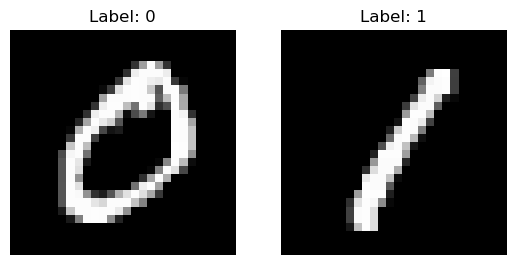

In [65]:
# load train and test data of the mnist dataset and filter out digits 2 through 9
(x_train, y_train), (x_test, y_test) = mnist.load_data()

train_filter = np.where((y_train == 0 ) | (y_train == 1))
test_filter = np.where((y_test == 0) | (y_test == 1))

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

# print out class distributions
zero = len(np.where(y_train == 0)[0])
one = len(np.where(y_train == 1)[0])
print(zero, one)

zero = len(np.where(y_test == 0)[0])
one = len(np.where(y_test == 1)[0])
print(zero, one)

# transform images from 28x28 to 784
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

index_of_0 = np.where(y_train == 0)[0][0]
index_of_1 = np.where(y_train == 1)[0][0]

# plot a 0 and 1 image
plt.subplot(1, 2, 1)
plt.imshow(x_train[index_of_0], cmap='gray')
plt.title("Label: 0")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(x_train[index_of_1], cmap='gray')
plt.title("Label: 1")
plt.axis('off')
# plt.savefig('../Figures/0_and_1.png', dpi=400, bbox_inches='tight')

plt.show()

Mean of mean absolute coefficient difference: 0.03614897871676482
Standard deviation of mean coefficient differences: 0.004801763887007368


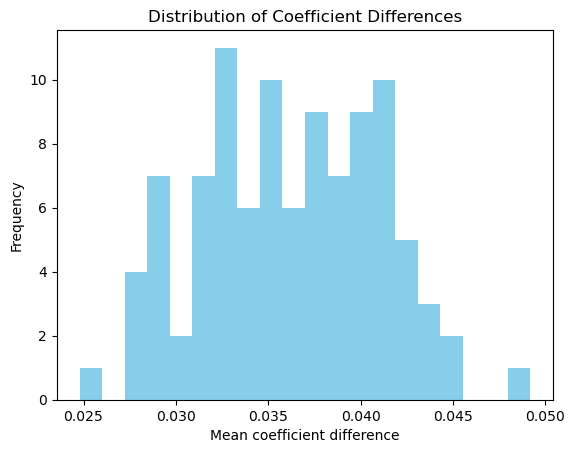

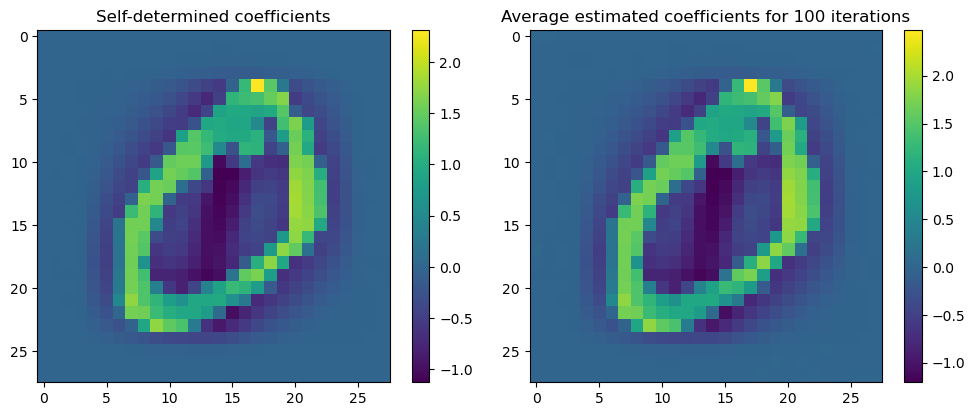

In [13]:
# load train and test data of the mnist dataset and filter out digits 2 through 9
(x_train, y_train), (x_test, y_test) = mnist.load_data()

train_filter = np.where((y_train == 0 ) | (y_train == 1))
test_filter = np.where((y_test == 0) | (y_test == 1))

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

# reshape 28x28 images to 784 vectors, and chose fixed coefficient vector
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)
index_of_0 = np.where(y_train == 0)[0][0]

scaler = StandardScaler()
x_train_flat_scaled = scaler.fit_transform(x_train_flat)
self_coeffs = x_train_flat_scaled[index_of_0]

# defines monte carlo parameters
num_images = 80000
num_iterations = 100
image_dim = (28, 28)

# keep score of estimation results
average_absolute_difference = []
average_estimated_coefficient = np.zeros(784)

# start of monte carlo simulation
for i in range(num_iterations):
    print(f'Iteration: {i}', end="\r")

    # randomly initialize images
    random_images = np.random.randint(0, 255, size=(num_images, *image_dim))
    random_images_flat = random_images.reshape(num_images, -1)
    random_images_flat_scaled = scaler.fit_transform(random_images_flat)

    # compute logistic regression binary outcomes with images and self_coeffs
    linear_combination = np.dot(random_images_flat_scaled, self_coeffs)
    probabilities = expit(linear_combination)

    # generate binary outcomes based on the probabilities
    artificial_y_train = np.random.binomial(1, probabilities)
    model = LogisticRegression(penalty=None, solver='saga', max_iter=10000, random_state=0)
    model.fit(random_images_flat_scaled, artificial_y_train)

    # keep score of the estimated coefficients
    estimated_coefficients = model.coef_[0]
    average_absolute_difference.append(np.mean(np.abs(self_coeffs - estimated_coefficients)))
    average_estimated_coefficient += estimated_coefficients

# calculate wanted metrics of the simulation
mean_diff = np.mean(average_absolute_difference)
std_diff = np.std(average_absolute_difference)
average_estimated_coefficient = average_estimated_coefficient / num_iterations


# print the MMAD en SMAD, plot the MAD distribution, plot the fixed/estimated coefficient images
print(f"Mean of mean absolute coefficient difference: {mean_diff}")
print(f"Standard deviation of mean coefficient differences: {std_diff}")

plt.hist(average_absolute_difference, bins=20, color='skyblue')
plt.title('Distribution of Coefficient Differences')
plt.xlabel('Mean coefficient difference')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1) 
plt.imshow(self_coeffs.reshape(28,28), cmap='viridis', interpolation='nearest')
plt.title("Self-determined coefficients")
plt.colorbar()

plt.subplot(1, 2, 2) 
plt.imshow(average_estimated_coefficient.reshape(28,28), cmap='viridis', interpolation='nearest')
plt.title(f"Average estimated coefficients for {num_iterations} iterations")
plt.colorbar()

plt.tight_layout()
plt.show()


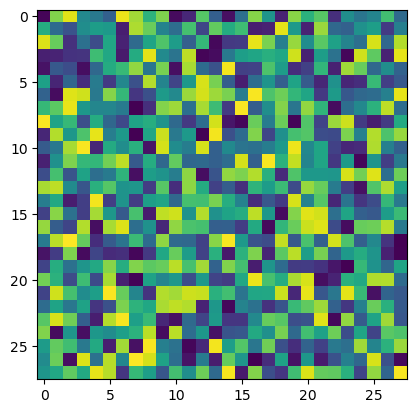

In [5]:
random_images = np.random.randint(0, 255, size=(1, *(28,28)))
plt.imshow(random_images[0])